In [1]:
import re
import pandas as pd

In [2]:
iphone = pd.read_json('reddit_iphone.json')

In [3]:
iphone = iphone.drop_duplicates()

In [4]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1562 non-null   object
 1   Upvotes  1562 non-null   int64 
 2   URL      1562 non-null   object
 3   Created  1562 non-null   int64 
 4   Text     1562 non-null   object
dtypes: int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
def infer_gender_from_text(text):
    # Define gendered terms
    male_terms = ['he', 'him', 'his', 'man', 'boy', 'male']
    female_terms = ['she', 'her', 'hers', 'woman', 'girl', 'female']
    
    # Convert text to lowercase for easier matching
    text = text.lower()
    
    # Check for the presence of male or female terms in the text
    if any(term in text for term in female_terms):
        return 'female'
    elif any(term in text for term in male_terms):
        return 'Male'
    else:
        return 'Unknown'

In [6]:
def infer_age_from_text(text):
    # Define age-related keywords for different age ranges
    age_keywords = {
        'teen': (13, 19),
        'twenty': (20, 29),
        'thirty': (30, 39),
        'forty': (40, 49),
        'fifty': (50, 59),
        'sixty': (60, 69)
    }
    
    # Convert text to lowercase for easier matching
    text = text.lower()
    
    # Loop through age-related keywords and match
    for keyword, age_range in age_keywords.items():
        if keyword in text:
            return age_range
    
    # Default to a random age range if no keyword is found
    return None  # Default to 'twenty'

In [7]:
iphone['gender'] = iphone['Text'].apply(infer_gender_from_text)
iphone['age'] = iphone['Text'].apply(infer_age_from_text)

In [8]:
iphone['gender']

0          Male
1          Male
2          Male
3       Unknown
4        female
         ...   
9548     female
9575       Male
9601     female
9689     female
9703    Unknown
Name: gender, Length: 1562, dtype: object

In [9]:
iphone['gender'].value_counts()

gender
female     638
Male       581
Unknown    343
Name: count, dtype: int64

In [10]:
iphone = iphone[iphone['gender'] != 'Unknown']

In [11]:
iphone['age']

0       None
1       None
2       None
4       None
5       None
        ... 
9513    None
9548    None
9575    None
9601    None
9689    None
Name: age, Length: 1219, dtype: object

In [12]:
iphone['age'].value_counts()

age
(13, 19)    9
Name: count, dtype: int64

In [13]:
## we only get three person only who mentioned about their age so we not proceed about it .

In [14]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [15]:
from textblob import TextBlob

In [16]:
iphone['sentiment'] = iphone['Text'].apply(get_sentiment)

In [17]:
iphone['sentiment'].value_counts()

sentiment
 0.000000    158
 0.250000     16
 0.200000     14
-0.100000     12
 0.050000     11
            ... 
 0.128231      1
 0.084091      1
 0.125909      1
 0.008333      1
-0.152041      1
Name: count, Length: 536, dtype: int64

In [18]:
gender_sentiment = iphone.groupby('gender')['sentiment'].mean().reset_index()

In [19]:
import matplotlib.pyplot as plt

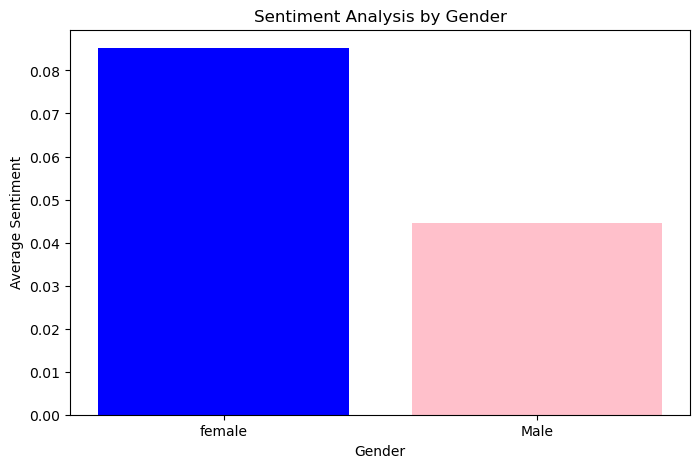

In [20]:
plt.figure(figsize=(8, 5))
gender_sentiment.sort_values('sentiment', ascending=False, inplace=True)
plt.bar(gender_sentiment['gender'], gender_sentiment['sentiment'], color=['blue', 'pink', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Analysis by Gender')
plt.show()

## for samsung

In [21]:
samsung = pd.read_json('reddit_samsung.json')
samsung = samsung.drop_duplicates()
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 9444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1862 non-null   object
 1   Upvotes  1862 non-null   int64 
 2   URL      1862 non-null   object
 3   Created  1862 non-null   int64 
 4   Text     1862 non-null   object
dtypes: int64(2), object(3)
memory usage: 87.3+ KB


In [22]:
samsung['gender'] = samsung['Text'].apply(infer_gender_from_text)
samsung['age'] = samsung['Text'].apply(infer_age_from_text)

In [23]:
samsung['gender'].value_counts()

gender
female     999
Male       675
Unknown    188
Name: count, dtype: int64

In [24]:
samsung = samsung[samsung['gender'] != 'Unknown']

In [25]:
samsung['age'].value_counts()  ## we goona drop it again.

Series([], Name: count, dtype: int64)

In [26]:
samsung['sentiment'] = samsung['Text'].apply(get_sentiment)

In [27]:
samsung['sentiment'].value_counts()

sentiment
 0.000000    136
 0.500000     36
 0.095248     31
 0.100000     16
 0.200000     14
            ... 
-0.081944      1
 0.120000      1
 0.072769      1
-0.025103      1
 0.137980      1
Name: count, Length: 609, dtype: int64

In [28]:
gender_sentiment = samsung.groupby('gender')['sentiment'].mean().reset_index()

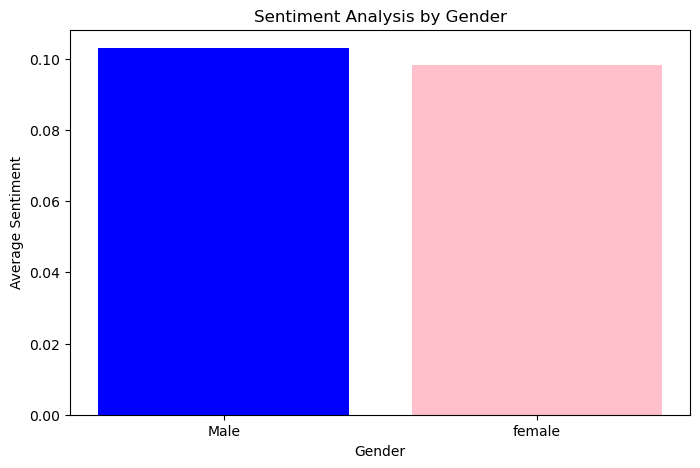

In [29]:
plt.figure(figsize=(8, 5))
gender_sentiment.sort_values('sentiment', ascending=False, inplace=True)
plt.bar(gender_sentiment['gender'], gender_sentiment['sentiment'], color=['blue', 'pink', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Analysis by Gender')
plt.show()

## for xiaomi

In [30]:
xiaomi = pd.read_json('reddit_xiaomi.json')
xiaomi = xiaomi.drop_duplicates()
xiaomi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 0 to 9298
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1523 non-null   object
 1   Upvotes  1523 non-null   int64 
 2   URL      1523 non-null   object
 3   Created  1523 non-null   int64 
 4   Text     1523 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.4+ KB


In [31]:
xiaomi['gender'] = xiaomi['Text'].apply(infer_gender_from_text)
xiaomi['age'] = xiaomi['Text'].apply(infer_age_from_text)

In [32]:
xiaomi['gender'].value_counts()

gender
Male       701
female     637
Unknown    185
Name: count, dtype: int64

In [33]:
xiaomi = xiaomi[xiaomi['gender'] != 'Unknown']

In [34]:
xiaomi['age'].value_counts() ## again we do the same.

Series([], Name: count, dtype: int64)

In [35]:
xiaomi['sentiment'] = xiaomi['Text'].apply(get_sentiment)

In [36]:
xiaomi['sentiment'].value_counts()

sentiment
 0.000000    218
 0.200000     26
 0.100000     18
 0.250000     16
 0.166667     14
            ... 
 0.186111      1
 0.317143      1
-0.025000      1
-0.081818      1
 0.150198      1
Name: count, Length: 509, dtype: int64

In [37]:
gender_sentiment = xiaomi.groupby('gender')['sentiment'].mean().reset_index()

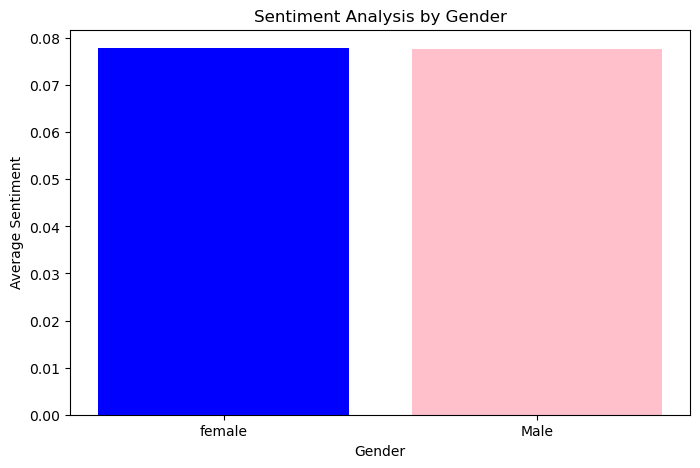

In [38]:
plt.figure(figsize=(8, 5))
gender_sentiment.sort_values('sentiment', ascending=False, inplace=True)
plt.bar(gender_sentiment['gender'], gender_sentiment['sentiment'], color=['blue', 'pink', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Analysis by Gender')
plt.show()

## for oneplus

In [39]:
oneplus = pd.read_json('reddit_iphone.json')
oneplus = oneplus.drop_duplicates()
oneplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1562 non-null   object
 1   Upvotes  1562 non-null   int64 
 2   URL      1562 non-null   object
 3   Created  1562 non-null   int64 
 4   Text     1562 non-null   object
dtypes: int64(2), object(3)
memory usage: 73.2+ KB


In [40]:
oneplus['gender'] = oneplus['Text'].apply(infer_gender_from_text)
oneplus['age'] = oneplus['Text'].apply(infer_age_from_text)

In [41]:
oneplus['gender'].value_counts()

gender
female     638
Male       581
Unknown    343
Name: count, dtype: int64

In [42]:
oneplus = oneplus[oneplus['gender'] != 'Unknown']

In [43]:
oneplus['age'].value_counts()  ## again we drop it

age
(13, 19)    9
Name: count, dtype: int64

In [44]:
oneplus['sentiment'] = oneplus['Text'].apply(get_sentiment)

In [45]:
oneplus['sentiment'].value_counts()

sentiment
 0.000000    158
 0.250000     16
 0.200000     14
-0.100000     12
 0.050000     11
            ... 
 0.128231      1
 0.084091      1
 0.125909      1
 0.008333      1
-0.152041      1
Name: count, Length: 536, dtype: int64

In [46]:
gender_sentiment = oneplus.groupby('gender')['sentiment'].mean().reset_index()

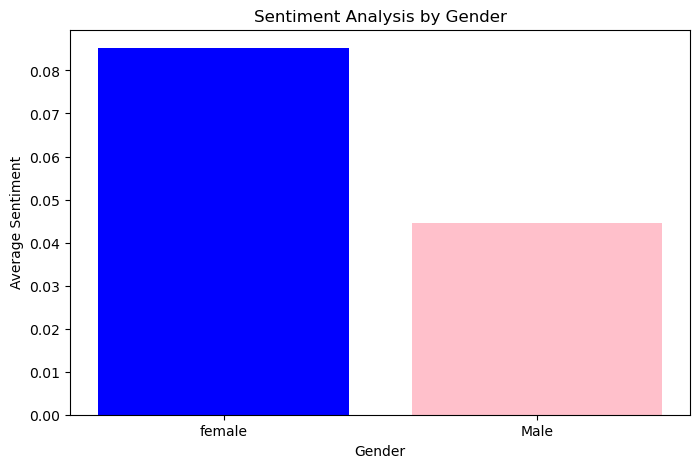

In [47]:
plt.figure(figsize=(8, 5))
gender_sentiment.sort_values('sentiment', ascending=False, inplace=True)
plt.bar(gender_sentiment['gender'], gender_sentiment['sentiment'], color=['blue', 'pink', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Analysis by Gender')
plt.show()

In [48]:
## In this file other than positive and negative sentiment we get a better idea of average of sentiment of male and female of each smartphone brands.

The results allow us to see whether there are noticeable differences in how men and women feel about specific brands, and whether certain brands evoke more positive or negative sentiments among different genders.